In [7]:
# 1. First, upload your CSV files to Colab
# Click the folder icon in the left sidebar and upload both CSV files

In [8]:
# 2. Run this cell to import libraries and set up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Enable inline plotting for Colab
%matplotlib inline

# Set plot style
plt.style.use('seaborn-v0_8')  # Updated style name for newer versions
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

In [9]:
# 3. Load and prepare the data
# Check if files are available
!ls -la *.csv

# Load data
s2_data = pd.read_csv('Potomac_Sentinel2_Water_Quality.csv')
l8_data = pd.read_csv('Potomac_Landsat8_Water_Quality.csv')

# Display basic information
print("Sentinel-2 data:")
print(f"Number of observations: {len(s2_data)}")
print("\nLandsat-8 data:")
print(f"Number of observations: {len(l8_data)}")

# Show first few rows
s2_data.head()

-rw-r--r-- 1 root root 1281 Mar 24 22:14 Potomac_Landsat8_Water_Quality.csv
-rw-r--r-- 1 root root 5067 Mar 24 22:14 Potomac_Sentinel2_Water_Quality.csv
Sentinel-2 data:
Number of observations: 29

Landsat-8 data:
Number of observations: 7


,system:index,chl_a,date,ndwi,turbidity,water_pixels,.geo
0,20230113T160619_20230113T160620_T18SUJ,0.912716,2023-01-13,0.116674,0.866905,2317.694118,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,20230115T155611_20230115T155611_T18SUJ,0.899617,2023-01-15,0.130472,0.855295,4028.219608,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,20230204T155441_20230204T160022_T18SUJ,0.910922,2023-02-04,0.130576,0.844470,4024.282353,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,20230224T155231_20230224T155551_T18SUJ,0.791791,2023-02-24,0.181966,0.874211,4098.050980,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,20230301T155159_20230301T160008_T18SUJ,0.872385,2023-03-01,0.145169,0.856182,3148.427451,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [10]:
# 4. Process the data
# Add source column to each dataset
s2_data['source'] = 'Sentinel-2'
l8_data['source'] = 'Landsat-8'

# Convert date column to datetime
s2_data['date'] = pd.to_datetime(s2_data['date'])
l8_data['date'] = pd.to_datetime(l8_data['date'])

# Sort by date
s2_data = s2_data.sort_values('date')
l8_data = l8_data.sort_values('date')

# Add season column based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

s2_data['season'] = s2_data['date'].dt.month.apply(get_season)
l8_data['season'] = l8_data['date'].dt.month.apply(get_season)

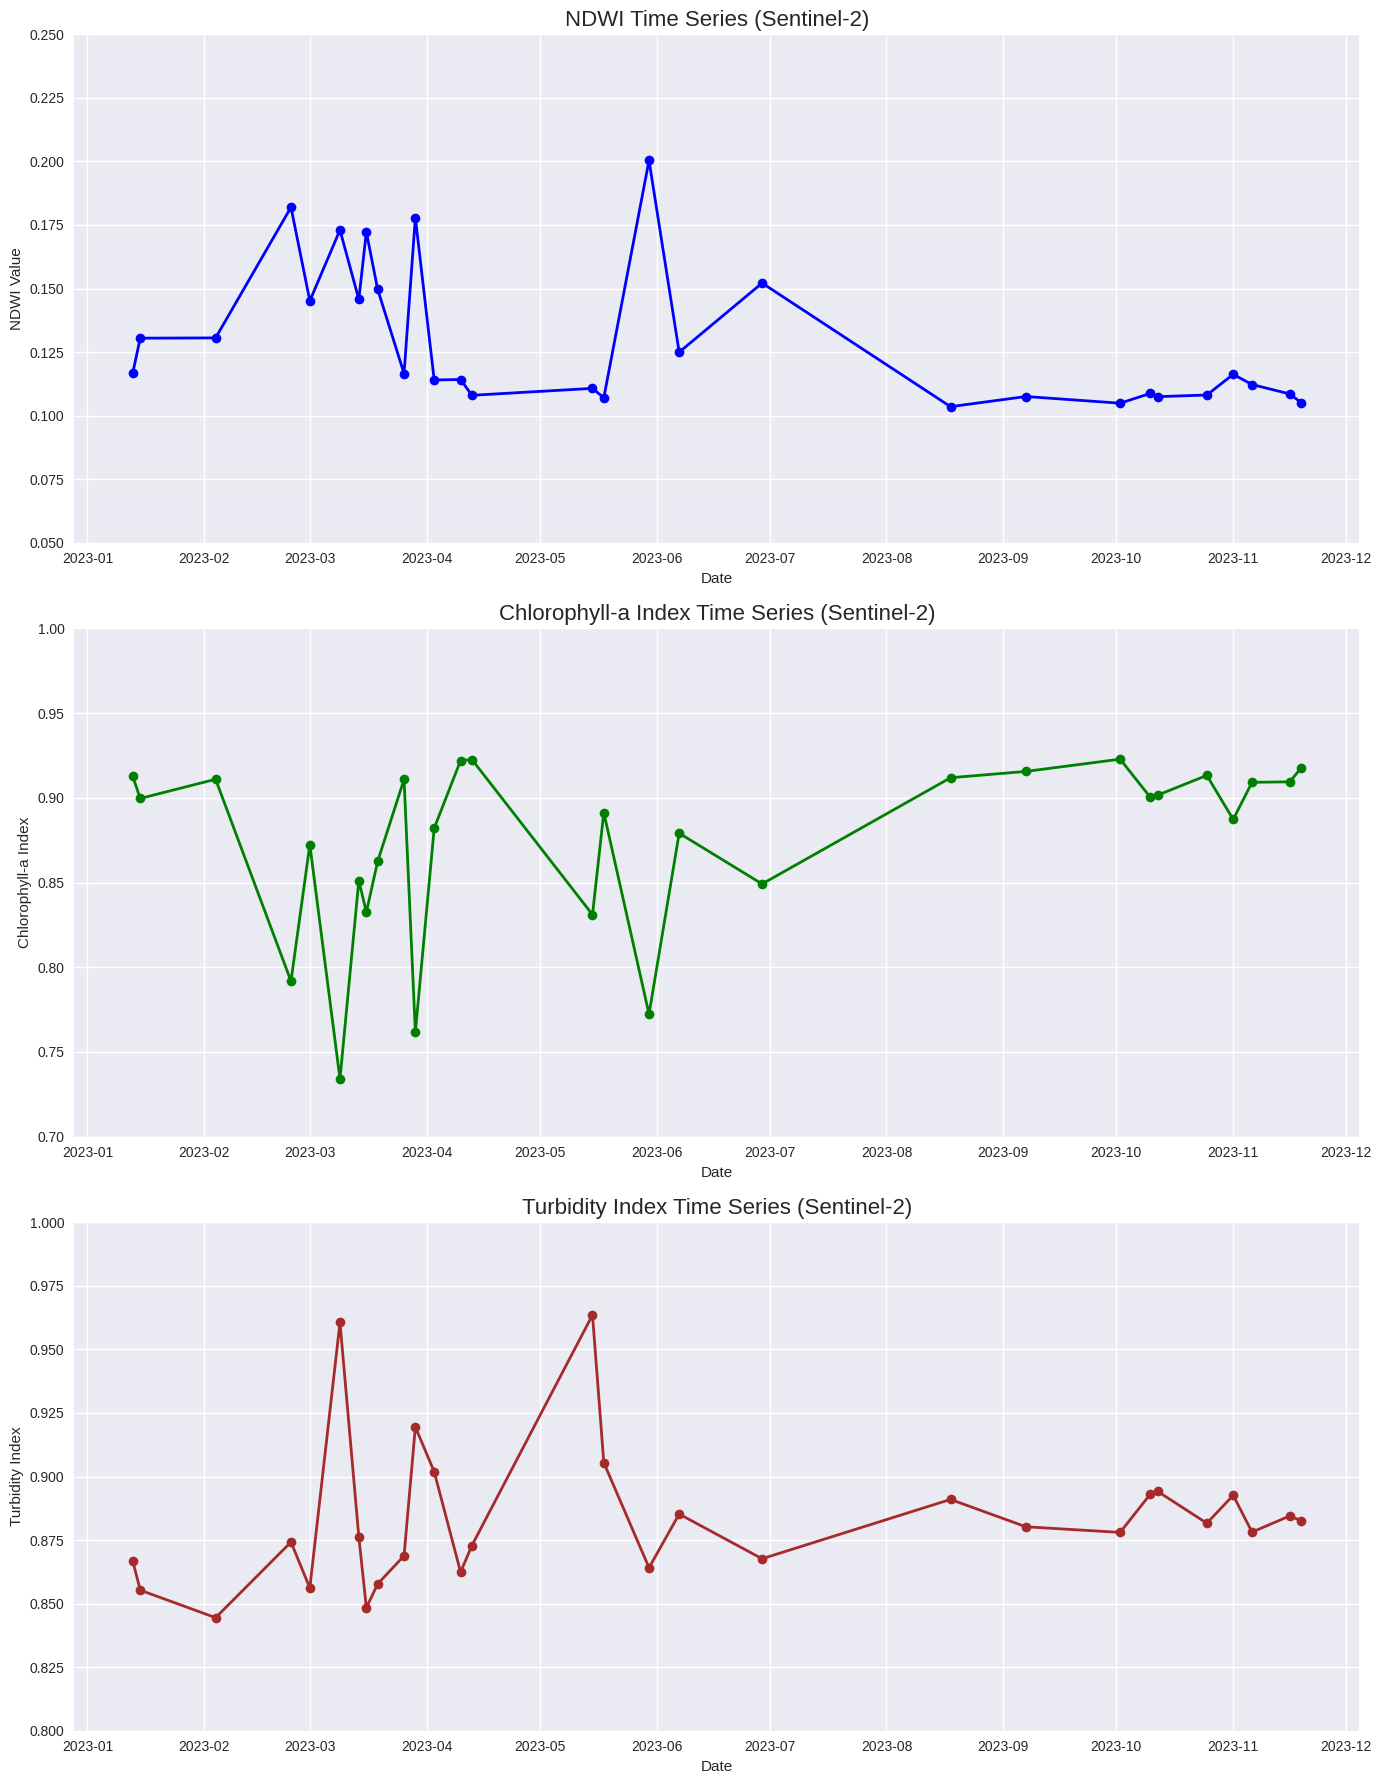

In [11]:
# 5. Create Time Series Visualizations
# Create time series plots for Sentinel-2 data
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# NDWI Time Series
axes[0].plot(s2_data['date'], s2_data['ndwi'], 'o-', color='blue', linewidth=2)
axes[0].set_title('NDWI Time Series (Sentinel-2)', fontsize=16)
axes[0].set_ylabel('NDWI Value')
axes[0].set_ylim(0.05, 0.25)
axes[0].grid(True)

# Chlorophyll-a Time Series
axes[1].plot(s2_data['date'], s2_data['chl_a'], 'o-', color='green', linewidth=2)
axes[1].set_title('Chlorophyll-a Index Time Series (Sentinel-2)', fontsize=16)
axes[1].set_ylabel('Chlorophyll-a Index')
axes[1].set_ylim(0.7, 1.0)
axes[1].grid(True)

# Turbidity Time Series
axes[2].plot(s2_data['date'], s2_data['turbidity'], 'o-', color='brown', linewidth=2)
axes[2].set_title('Turbidity Index Time Series (Sentinel-2)', fontsize=16)
axes[2].set_ylabel('Turbidity Index')
axes[2].set_ylim(0.8, 1.0)
axes[2].grid(True)

for ax in axes:
    ax.set_xlabel('Date')

plt.tight_layout()
plt.savefig('sentinel2_time_series.png')
plt.show()


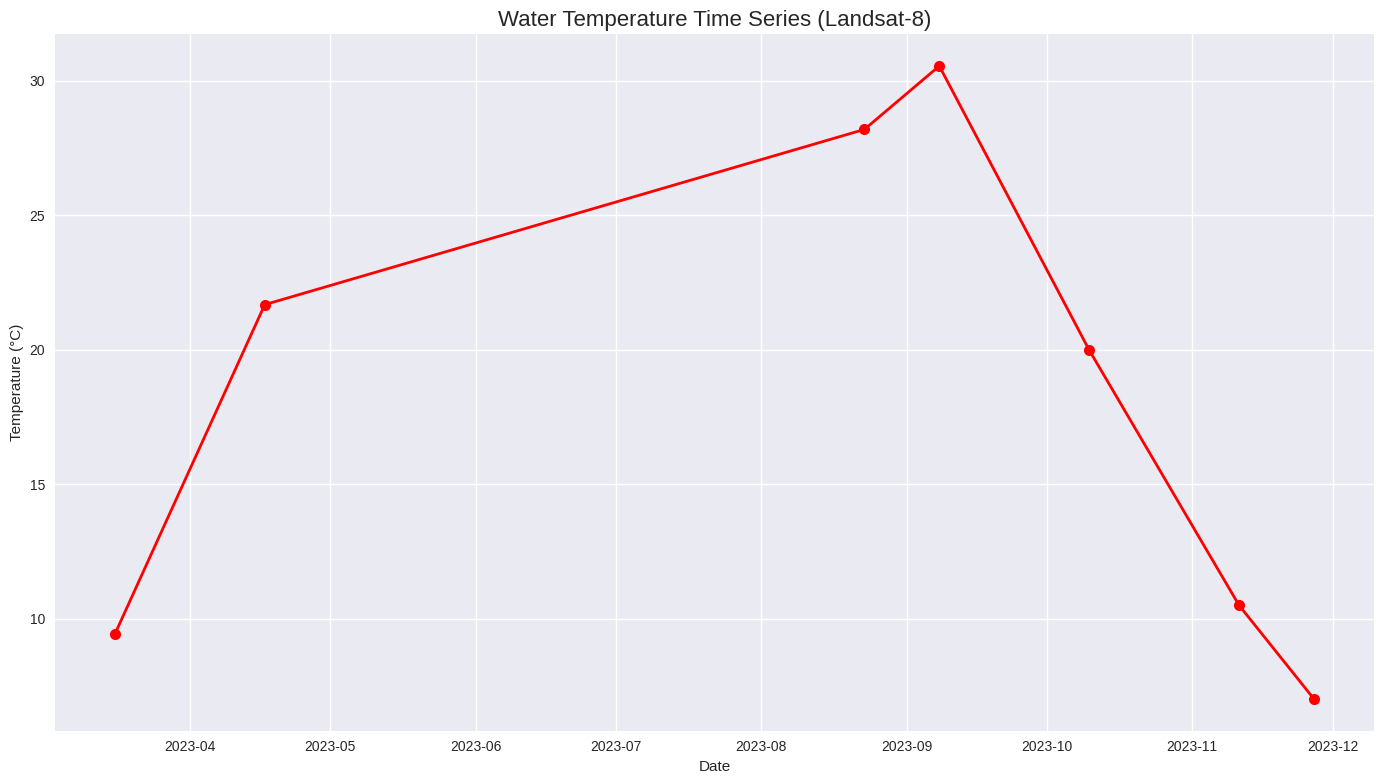

In [12]:
# 6. Create Landsat Temperature Visualization
# Create time series for Landsat-8 water temperature
plt.figure(figsize=(14, 8))
plt.plot(l8_data['date'], l8_data['water_temp'], 'o-', color='red', linewidth=2, markersize=8)
plt.title('Water Temperature Time Series (Landsat-8)', fontsize=16)
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.savefig('landsat8_temperature.png')
plt.show()


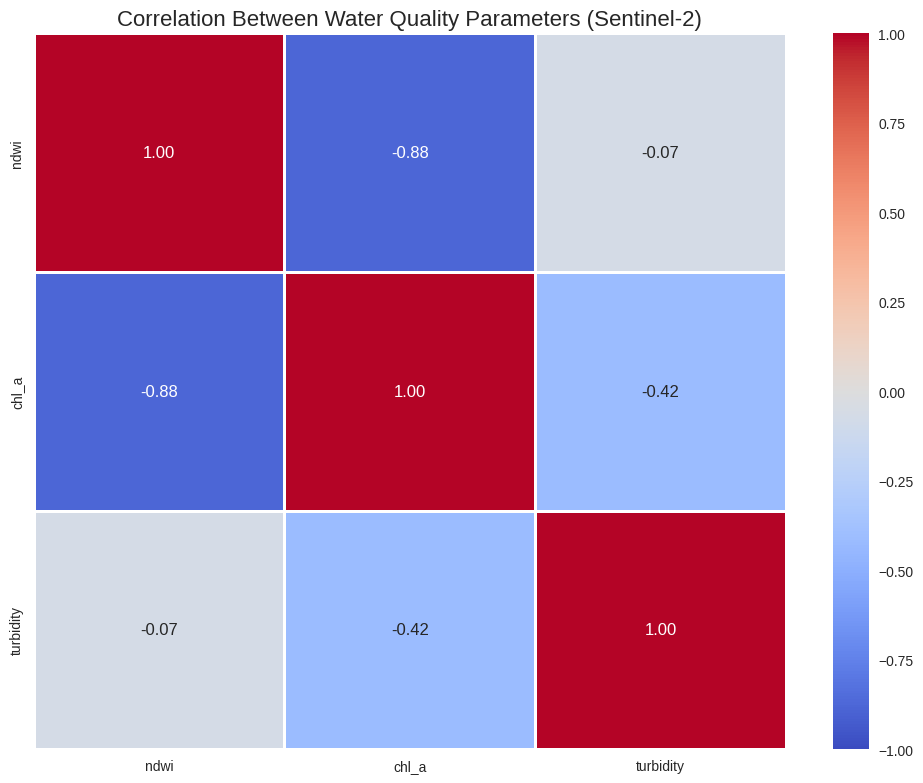

In [13]:
# 7. Correlation Analysis
# Calculate correlation matrix for Sentinel-2 data
s2_corr = s2_data[['ndwi', 'chl_a', 'turbidity']].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(s2_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=2)
plt.title('Correlation Between Water Quality Parameters (Sentinel-2)', fontsize=16)
plt.tight_layout()
plt.savefig('parameter_correlation.png')
plt.show()

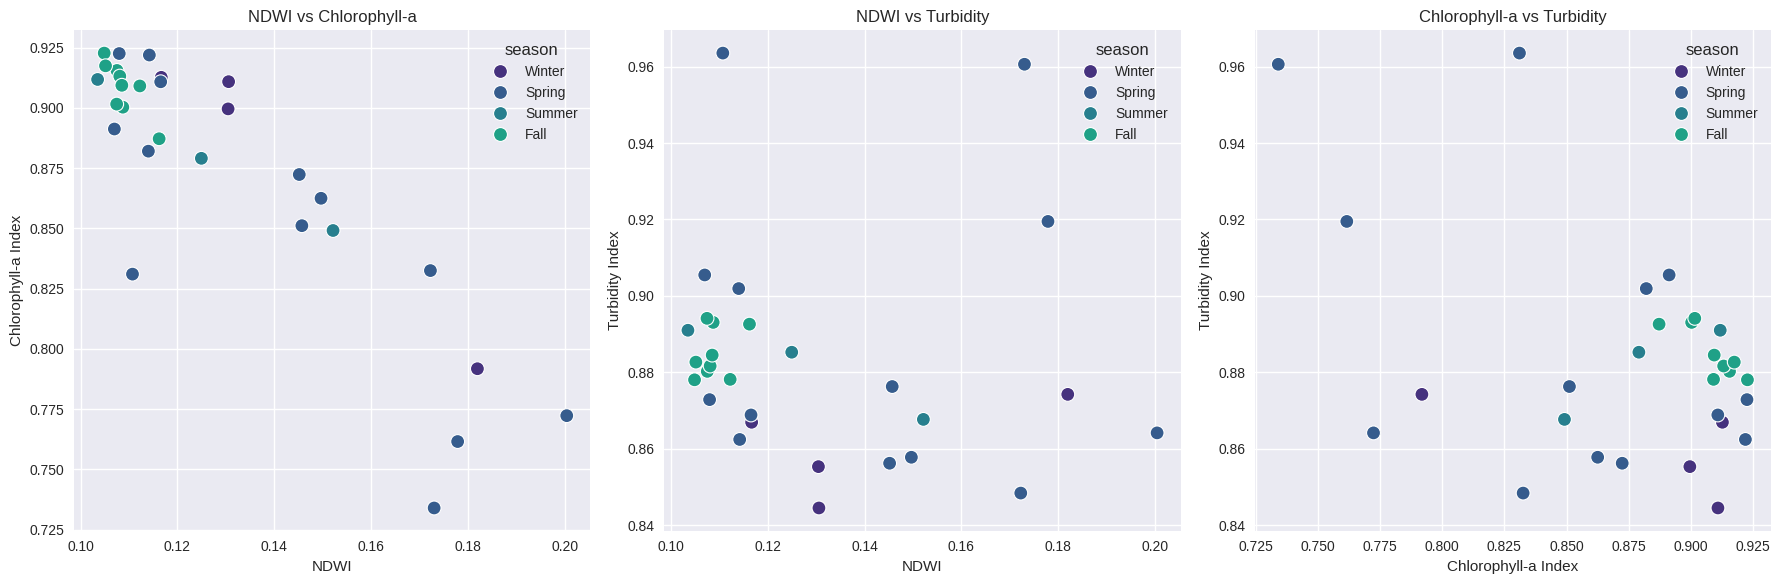

In [14]:
# 8. Create Parameter Relationship Visualizations
# Create scatter plots to visualize relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# NDWI vs Chlorophyll-a
sns.scatterplot(x='ndwi', y='chl_a', data=s2_data, hue='season', s=100, ax=axes[0])
axes[0].set_title('NDWI vs Chlorophyll-a')
axes[0].set_xlabel('NDWI')
axes[0].set_ylabel('Chlorophyll-a Index')

# NDWI vs Turbidity
sns.scatterplot(x='ndwi', y='turbidity', data=s2_data, hue='season', s=100, ax=axes[1])
axes[1].set_title('NDWI vs Turbidity')
axes[1].set_xlabel('NDWI')
axes[1].set_ylabel('Turbidity Index')

# Chlorophyll-a vs Turbidity
sns.scatterplot(x='chl_a', y='turbidity', data=s2_data, hue='season', s=100, ax=axes[2])
axes[2].set_title('Chlorophyll-a vs Turbidity')
axes[2].set_xlabel('Chlorophyll-a Index')
axes[2].set_ylabel('Turbidity Index')

plt.tight_layout()
plt.savefig('parameter_relationships.png')
plt.show()

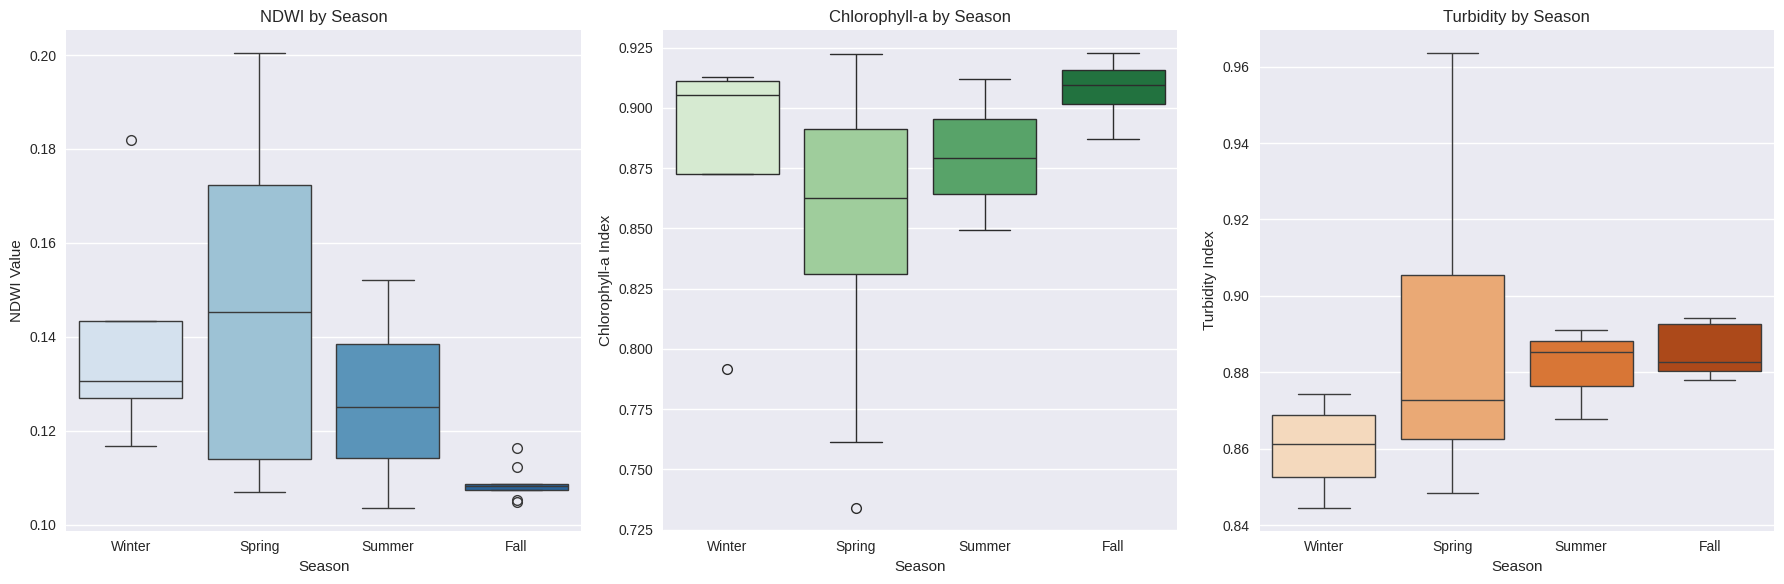

In [20]:
# 9. Seasonal Analysis
# Create box plots for seasonal patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Order seasons chronologically
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# NDWI by Season
sns.boxplot(x='season', y='ndwi', hue='season', data=s2_data, ax=axes[0],
            order=season_order, palette='Blues', legend=False)
axes[0].set_title('NDWI by Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('NDWI Value')

# Chlorophyll-a by Season
sns.boxplot(x='season', y='chl_a', hue='season', data=s2_data, ax=axes[1],
            order=season_order, palette='Greens', legend=False)
axes[1].set_title('Chlorophyll-a by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Chlorophyll-a Index')

# Turbidity by Season
sns.boxplot(x='season', y='turbidity', hue='season', data=s2_data, ax=axes[2],
            order=season_order, palette='Oranges', legend=False)
axes[2].set_title('Turbidity by Season')
axes[2].set_xlabel('Season')
axes[2].set_ylabel('Turbidity Index')

plt.tight_layout()
plt.savefig('seasonal_patterns.png')
plt.show()


In [16]:
# 10. Temperature Impact Analysis
# Function to find closest date in Sentinel-2 data for each Landsat-8 observation
def find_closest_date(l8_date, s2_dates):
    closest_idx = np.argmin([abs((date - l8_date).days) for date in s2_dates])
    return s2_dates.iloc[closest_idx]

# For each Landsat date, find matching Sentinel-2 data
temp_effect_data = []
for _, l8_row in l8_data.iterrows():
    closest_s2_date = find_closest_date(l8_row['date'], s2_data['date'])
    s2_match = s2_data[s2_data['date'] == closest_s2_date].iloc[0]

    temp_effect_data.append({
        'date': l8_row['date'],
        'water_temp': l8_row['water_temp'],
        'ndwi': s2_match['ndwi'],
        'chl_a': s2_match['chl_a'],
        'turbidity': s2_match['turbidity'],
        'season': l8_row['season'],
        'days_apart': abs((l8_row['date'] - closest_s2_date).days)
    })

temp_effect_df = pd.DataFrame(temp_effect_data)

# Only use matches within 7 days to ensure reliability
temp_effect_df = temp_effect_df[temp_effect_df['days_apart'] <= 7]
print(f"Number of valid temperature-parameter pairs: {len(temp_effect_df)}")
temp_effect_df.head()


Number of valid temperature-parameter pairs: 6


,date,water_temp,ndwi,chl_a,turbidity,season,days_apart
0,2023-03-16,9.433730,0.172262,0.832522,0.848373,Spring,0
1,2023-04-17,21.678264,0.107990,0.922594,0.872837,Spring,4
2,2023-08-23,28.189031,0.103522,0.911836,0.890991,Summer,5
3,2023-09-08,30.547080,0.107520,0.915570,0.880229,Fall,1
4,2023-10-10,19.990596,0.108729,0.900333,0.893048,Fall,0


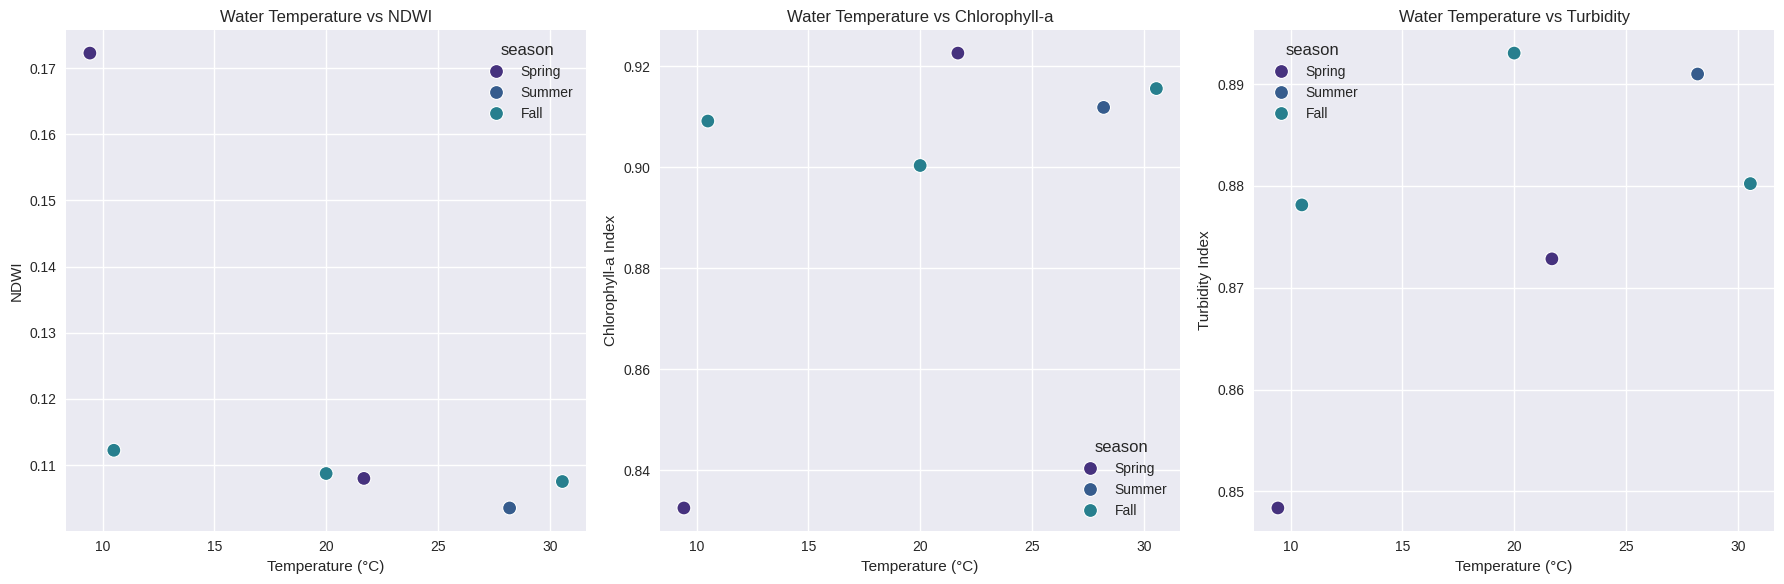

Correlation with water temperature:
water_temp    1.000000
ndwi         -0.662424
chl_a         0.636780
turbidity     0.613513
Name: water_temp, dtype: float64


In [17]:
# 11. Create Temperature Relationship Plots if we have data
if len(temp_effect_df) > 0:  # Only proceed if we have matched data
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Temperature vs NDWI
    sns.scatterplot(x='water_temp', y='ndwi', data=temp_effect_df, hue='season', s=100, ax=axes[0])
    axes[0].set_title('Water Temperature vs NDWI')
    axes[0].set_xlabel('Temperature (°C)')
    axes[0].set_ylabel('NDWI')

    # Temperature vs Chlorophyll-a
    sns.scatterplot(x='water_temp', y='chl_a', data=temp_effect_df, hue='season', s=100, ax=axes[1])
    axes[1].set_title('Water Temperature vs Chlorophyll-a')
    axes[1].set_xlabel('Temperature (°C)')
    axes[1].set_ylabel('Chlorophyll-a Index')

    # Temperature vs Turbidity
    sns.scatterplot(x='water_temp', y='turbidity', data=temp_effect_df, hue='season', s=100, ax=axes[2])
    axes[2].set_title('Water Temperature vs Turbidity')
    axes[2].set_xlabel('Temperature (°C)')
    axes[2].set_ylabel('Turbidity Index')

    plt.tight_layout()
    plt.savefig('temperature_relationships.png')
    plt.show()

    # Calculate correlation with temperature
    print("Correlation with water temperature:")
    print(temp_effect_df[['water_temp', 'ndwi', 'chl_a', 'turbidity']].corr()['water_temp'])


In [22]:
# 12. Generate Summary Statistics by Season
# Calculate seasonal statistics
s2_seasonal_stats = s2_data.groupby('season').agg({
    'ndwi': ['mean', 'std', 'min', 'max'],
    'chl_a': ['mean', 'std', 'min', 'max'],
    'turbidity': ['mean', 'std', 'min', 'max']
})

# Reorder the seasons
s2_seasonal_stats = s2_seasonal_stats.reindex(season_order)

# Display the statistics
print("Sentinel-2 Parameter Statistics by Season:")
display(s2_seasonal_stats)

# Temperature statistics by season
l8_seasonal_stats = l8_data.groupby('season')['water_temp'].agg(['mean', 'std', 'min', 'max'])
l8_seasonal_stats = l8_seasonal_stats.reindex(season_order)

print("\nLandsat-8 Temperature Statistics by Season:")
display(l8_seasonal_stats)

# Note about missing winter temperature data
print("\nNote: Winter temperature data (December-February) contains NaN values due to")
print("limited Landsat-8 observations during winter months. This is likely caused by")
print("increased cloud cover during winter, which is a common limitation when working")
print("with optical satellite data in temperate regions.")



Sentinel-2 Parameter Statistics by Season:


ndwi                                   chl_a                      \
            mean       std       min       max      mean       std       min   
season                                                                         
Winter  0.139922  0.028780  0.116674  0.181966  0.878761  0.058270  0.791791   
Spring  0.141123  0.031905  0.106986  0.200417  0.849715  0.061591  0.733999   
Summer  0.126874  0.024369  0.103522  0.152146  0.880032  0.031350  0.849157   
Fall    0.108761  0.003529  0.104884  0.116228  0.908530  0.010753  0.887229   

                 turbidity                                
             max      mean       std       min       max  
season                                                    
Winter  0.912716  0.860220  0.013073  0.844470  0.874211  
Spring  0.922594  0.889059  0.038638  0.848373  0.963550  
Summer  0.911836  0.881297  0.012157  0.867656  0.890991  
Fall    0.922784  0.884991  0.006529  0.878020  0.894111


Landsat-8 Temperature Statistics by Season:


,mean,std,min,max
season,,,,
Winter,NaN,NaN,NaN,NaN
Spring,15.555997,8.658192,9.433730,21.678264
Summer,28.189031,NaN,28.189031,28.189031
Fall,17.015458,10.555515,7.020828,30.547080



Note: Winter temperature data (December-February) contains NaN values due to
limited Landsat-8 observations during winter months. This is likely caused by
increased cloud cover during winter, which is a common limitation when working
with optical satellite data in temperate regions.


In [28]:
# 13. Conclusion Summary
print("CONCLUSION:")
print("\nThis analysis shows the seasonal patterns and relationships between water quality parameters in the Georgetown section of the Potomac River.")
print("\nKey observations include:")
print("\n1. Seasonal variations in all water quality parameters")
print("2. Correlation between parameters suggesting interrelated water quality dynamics")
print("3. Temperature dependency of certain parameters, particularly chlorophyll-a")
print("\nThese insights help understand the complex dynamics of urban river water quality throughout the year.")

CONCLUSION:

This analysis shows the seasonal patterns and relationships between water quality parameters in the Georgetown section of the Potomac River.

Key observations include:

1. Seasonal variations in all water quality parameters
2. Correlation between parameters suggesting interrelated water quality dynamics
3. Temperature dependency of certain parameters, particularly chlorophyll-a

These insights help understand the complex dynamics of urban river water quality throughout the year.
